In [57]:
import matplotlib.pyplot as plt

In [190]:
import pandas as pd
df=pd.read_csv("data-jobs-listings-glassdoor//glassdoor_reviews.csv")

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422180 entries, 0 to 422179
Data columns (total 28 columns):
id                                               422180 non-null int64
index                                            343221 non-null float64
reviews.val.cons                                 343214 non-null object
reviews.val.date                                 343221 non-null object
reviews.val.featured                             343221 non-null object
reviews.val.helpfulCount                         343221 non-null float64
reviews.val.id                                   343221 non-null float64
reviews.val.pros                                 343221 non-null object
reviews.val.publishedOn                          343221 non-null object
reviews.val.publisher                            343083 non-null object
reviews.val.reviewRatings.careerOpportunities    343221 non-null float64
reviews.val.reviewRatings.compBenefits           343221 non-null float64
reviews.val.reviewRat

In [192]:
df['reviews.val.pros']=df['reviews.val.pros'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422180 entries, 0 to 422179
Data columns (total 28 columns):
id                                               422180 non-null int64
index                                            343221 non-null float64
reviews.val.cons                                 343214 non-null object
reviews.val.date                                 343221 non-null object
reviews.val.featured                             343221 non-null object
reviews.val.helpfulCount                         343221 non-null float64
reviews.val.id                                   343221 non-null float64
reviews.val.pros                                 422180 non-null object
reviews.val.publishedOn                          343221 non-null object
reviews.val.publisher                            343083 non-null object
reviews.val.reviewRatings.careerOpportunities    343221 non-null float64
reviews.val.reviewRatings.compBenefits           343221 non-null float64
reviews.val.reviewRat

In [193]:
df['reviews.val.cons']=df['reviews.val.cons'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422180 entries, 0 to 422179
Data columns (total 28 columns):
id                                               422180 non-null int64
index                                            343221 non-null float64
reviews.val.cons                                 422180 non-null object
reviews.val.date                                 343221 non-null object
reviews.val.featured                             343221 non-null object
reviews.val.helpfulCount                         343221 non-null float64
reviews.val.id                                   343221 non-null float64
reviews.val.pros                                 422180 non-null object
reviews.val.publishedOn                          343221 non-null object
reviews.val.publisher                            343083 non-null object
reviews.val.reviewRatings.careerOpportunities    343221 non-null float64
reviews.val.reviewRatings.compBenefits           343221 non-null float64
reviews.val.reviewRat

In [ ]:
df["reviews.val.pros"]=df["reviews.val.pros"].fillna("")
df["reviews.val.cons"]=df["reviews.val.cons"].fillna("")

In [194]:
df.head(20)


,id,index,reviews.val.cons,reviews.val.date,reviews.val.featured,reviews.val.helpfulCount,reviews.val.id,reviews.val.pros,reviews.val.publishedOn,reviews.val.publisher,...,reviews.val.reviewerJobTitle,reviews.val.reviewerLocation,reviews.val.reviewerStatus,reviews.val.summaryPoints.ceoApproval,reviews.val.summaryPoints.outlook,reviews.val.summaryPoints.recommend,reviews.val.title,reviews.val.adviceToManagement,reviews.val.companyResponse,reviews.val.reviewResponses
0,44001,0.0,Still not big enough in market place,"Oct 20, 2010",False,0.0,689142.0,"Great brand , Good leadership , Clear business...","Oct 20, 2010",Director,...,Director,Tokyo (Japan),Former Employee,1.0,0.0,1.0,American Express Japan - Excellent place to work,None,NaN,NaN
1,44002,NaN,nan,NaN,NaN,NaN,NaN,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,44003,NaN,nan,NaN,NaN,NaN,NaN,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,44004,0.0,Nothing important on my point of view.,4 weeks ago,False,0.0,29659857.0,"Learn new technologies, helpful people, good m...",4 weeks ago,Software Engineer(Internship),...,Software Engineer(Internship),Alexandria (Egypt),Former Employee,1.0,1.0,1.0,one of the best places to be intern in,NaN,NaN,NaN
4,44004,1.0,Alot of friends working together which isn't v...,"May 29, 2019",False,0.0,26381884.0,Very good opportunities to learn technologies,"May 29, 2019",Network Engineer,...,Network Engineer,Alexandria (Egypt),Current Employee,1.0,1.0,1.0,Very Good Company,NaN,NaN,NaN
5,44004,2.0,Working hours are not good and need to add the...,"Mar 13, 2019",False,0.0,25136975.0,You can learn technically a lot in this company.,"Mar 13, 2019",Das RF Design Engineer,...,Das RF Design Engineer,Alexandria (Egypt),Former Employee,0.0,0.0,0.0,It is good company with large potential in tel...,NaN,NaN,NaN
6,44004,3.0,No Real Cons at all,"Feb 18, 2019",False,0.0,24751800.0,- Very friendly environment.\r\n- Highly exper...,"Feb 18, 2019",Software Engineering Intern,...,Software Engineering Intern,Alexandria (Egypt),Former Employee,1.0,1.0,1.0,Great Environment to work and learn,Just keep your motivation and spirit.,NaN,NaN
7,44004,4.0,"Little supervision, no precise individuals-fee...","Jan 19, 2019",False,0.0,24288425.0,"Great environment, helpful people, tensionless...","Jan 19, 2019",Software Engineer(Internship),...,Software Engineer(Internship),Alexandria (Egypt),Former Employee,0.0,0.0,1.0,Software Engineering Intern,Get your eyes closer on Interns.,NaN,NaN
8,44005,NaN,nan,NaN,NaN,NaN,NaN,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,44006,NaN,nan,NaN,NaN,NaN,NaN,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [211]:
df["pros_count"]=df.groupby("id")["reviews.val.pros"].transform('count')#["reviews.val.pros"]
df["cons_count"]=df.groupby("id")["reviews.val.cons"].transform('count')#["reviews.val.pros"]

new_df=df[["id","reviews.val.pros","pros_count","reviews.val.cons","cons_count"]].sort_values(by=["pros_count"],ascending=False)
new_df=new_df.head(500)
new_df

,id,reviews.val.pros,pros_count,reviews.val.cons,cons_count
315559,108176,If you are into a fast-paced financial service...,6,"Very skinny contracts in terms of benefits, wo...",6
112288,99163,"Time excelente, provavelmente o melhor da Amer...",6,"Apesar da carga horária flexível, é normal tra...",6
112286,99163,"Ambiente legal, bastante liberdade de aprender...",6,Empresa se encontra em uma cidade que nem todo...,6
330050,55885,"Great support from everyone around, everyone g...",6,"When vendors come in, they always bring pizzas...",6
330051,55885,Fast Track 20 executives are given the time an...,6,Difficult to uphold a work/life balance. Havin...,6
...,...,...,...,...,...
252668,148912,Great career opportunity with lots of projects...,5,The over-time issue sometimes occurs when the ...,5
252667,148912,"Great place to work, lots of things to learn.",5,has to be comfortable working in fast-paced en...,5
252783,148964,Good benefits\r\nNice people\r\nFlexible worki...,5,"not really any cons, the network is not Oracle...",5
252788,148968,"Cool company, great onboarding for all the int...",5,a bit unorganised within my team,5


In [213]:
#!pip install nltk
#import nltk
#nltk.download("punkt")
from nltk.tokenize import word_tokenize

new_df["tokenize_pros"]=new_df["reviews.val.pros"].apply(word_tokenize)
new_df["tokenize_cons"]=new_df["reviews.val.cons"].apply(word_tokenize)

print(new_df)



            id                                   reviews.val.pros  pros_count  \
315559  108176  If you are into a fast-paced financial service...           6   
112288   99163  Time excelente, provavelmente o melhor da Amer...           6   
112286   99163  Ambiente legal, bastante liberdade de aprender...           6   
330050   55885  Great support from everyone around, everyone g...           6   
330051   55885  Fast Track 20 executives are given the time an...           6   
...        ...                                                ...         ...   
252668  148912  Great career opportunity with lots of projects...           5   
252667  148912      Great place to work, lots of things to learn.           5   
252783  148964  Good benefits\r\nNice people\r\nFlexible worki...           5   
252788  148968  Cool company, great onboarding for all the int...           5   
252639  148902  Decent benefits for a tech firm, good work-lif...           5   

                           

In [215]:
#nltk.download('stopwords')
#new_df.drop("pros_no_stop_words",axis=1,inplace=True)
from nltk.corpus import stopwords
stop = stopwords.words('english')
new_df["pros_no_stop_words"]=new_df['tokenize_pros'].apply(lambda x: [item for item in x if item not in stop])
new_df.head(59)

,id,reviews.val.pros,pros_count,reviews.val.cons,cons_count,tokenize_pros,tokenize_cons,pros_no_stop_words
315559,108176,If you are into a fast-paced financial service...,6,"Very skinny contracts in terms of benefits, wo...",6,"[If, you, are, into, a, fast-paced, financial,...","[Very, skinny, contracts, in, terms, of, benef...","[If, fast-paced, financial, services, environm..."
112288,99163,"Time excelente, provavelmente o melhor da Amer...",6,"Apesar da carga horária flexível, é normal tra...",6,"[Time, excelente, ,, provavelmente, o, melhor,...","[Apesar, da, carga, horária, flexível, ,, é, n...","[Time, excelente, ,, provavelmente, melhor, da..."
112286,99163,"Ambiente legal, bastante liberdade de aprender...",6,Empresa se encontra em uma cidade que nem todo...,6,"[Ambiente, legal, ,, bastante, liberdade, de, ...","[Empresa, se, encontra, em, uma, cidade, que, ...","[Ambiente, legal, ,, bastante, liberdade, de, ..."
330050,55885,"Great support from everyone around, everyone g...",6,"When vendors come in, they always bring pizzas...",6,"[Great, support, from, everyone, around, ,, ev...","[When, vendors, come, in, ,, they, always, bri...","[Great, support, everyone, around, ,, everyone..."
330051,55885,Fast Track 20 executives are given the time an...,6,Difficult to uphold a work/life balance. Havin...,6,"[Fast, Track, 20, executives, are, given, the,...","[Difficult, to, uphold, a, work/life, balance,...","[Fast, Track, 20, executives, given, time, res..."
330052,55885,You are instantly welcomed to the Vohkus Famil...,6,"Lots of pizza, weight gain is likely! - BUT th...",6,"[You, are, instantly, welcomed, to, the, Vohku...","[Lots, of, pizza, ,, weight, gain, is, likely,...","[You, instantly, welcomed, Vohkus, Family, ope..."
330053,55885,I came into the Vohkus Family nearly 5 and a h...,6,There really isn't anything to mention.,6,"[I, came, into, the, Vohkus, Family, nearly, 5...","[There, really, is, n't, anything, to, mention...","[I, came, Vohkus, Family, nearly, 5, half, yea..."
330054,55885,"The team is amazing, and the work environment ...",6,We don't have enough parking spaces,6,"[The, team, is, amazing, ,, and, the, work, en...","[We, do, n't, have, enough, parking, spaces]","[The, team, amazing, ,, work, environment, nic..."
219999,144269,The course is perfectly planned for those who ...,6,I have no negatives for this role/company.,6,"[The, course, is, perfectly, planned, for, tho...","[I, have, no, negatives, for, this, role/compa...","[The, course, perfectly, planned, wish, kick-s..."
220000,144269,"Great support from everyone around, everyone g...",6,"When vendors come in, they always bring pizzas...",6,"[Great, support, from, everyone, around, ,, ev...","[When, vendors, come, in, ,, they, always, bri...","[Great, support, everyone, around, ,, everyone..."


In [229]:
from nltk.stem import PorterStemmer 
#from nltk.tokenize import word_tokenize 
   
ps = PorterStemmer() 
   
new_df["pros_no_stop_words_lemi"]=new_df['tokenize_pros'].apply(lambda x: [ps.stem(word) for word in x])
new_df["pros_no_stop_words_lemi"]



315559    [If, you, are, into, a, fast-pac, financi, ser...
112288    [time, excelent, ,, provavelment, o, melhor, d...
112286    [ambient, legal, ,, bastant, liberdad, de, apr...
330050    [great, support, from, everyon, around, ,, eve...
330051    [fast, track, 20, execut, are, given, the, tim...
                                ...                        
252668    [great, career, opportun, with, lot, of, proje...
252667    [great, place, to, work, ,, lot, of, thing, to...
252783    [good, benefit, nice, peopl, flexibl, work, hour]
252788    [cool, compani, ,, great, onboard, for, all, t...
252639    [decent, benefit, for, a, tech, firm, ,, good,...
Name: pros_no_stop_words_lemi, Length: 500, dtype: object

In [231]:
#new_df["pros_no_stop_words"]
# new_df["pros_no_stop_words"]=new_df["pros_no_stop_words"].apply(lambda x:' '.join([str(elem) for elem in x]))
# new_df["pros_no_stop_words"]
# word_freq_new_df=new_df["pros_no_stop_words"].str.split(expand=True).stack().value_counts()
# word_freq_new_df.head(100)
# word_freq.head(50)

# top_N = 50
# word_dist = nltk.FreqDist(new_df["pros_no_stop_words_lemi"])
# print('All frequencies')
# print('='*60)
# rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])
# rslt


In [206]:
word_freq=df["reviews.val.pros"].str.split(expand=True).stack().value_counts()


In [222]:
word_freq.head(50)

Themanagementseemedreallycareemployeeshappysupported.Cafeteriagreatinexpensivefoodoptions.Colleaguessupportivefun.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [204]:
#from sklearn.feature_extraction.text import CountVectorizer

#docs = ['why hello there', 'omg hello pony', 'she went there? omg']
#df["reviews.val.cons"]=df["reviews.val.cons"].replace(r"[^a-zA-Z\d\_]+", "")
#vec = CountVectorizer()
top_N = 50
word_dist = nltk.FreqDist(df["reviews.val.pros"])
print('All frequencies')
print('='*60)
rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])
rslt
#X = vec.fit_transform(df["reviews.val.pros"])
#n_df = pd.DataFrame(X.toarray())#, columns=vec.get_feature_names())
#print(n_df)

All frequencies


,Word,Frequency
0,nan,78959
1,I have been working at Rakuten full-time (More...,311
2,a lot to learn as a sales\r\nvery diverse culture,311
3,"nice office and facilities, decent benefit. go...",307
4,Relaxed atmosphere \r\nGood perks like free al...,305
5,Weekly direct talk from CEO. Weekly meeting fo...,305
6,Great working place to learn,282
7,great company to work and learn,280
8,Lots of smart people to learn from. \r\nFantas...,269
9,Coolest Managers\r\nFun at workplace\r\nSuppor...,269


In [37]:
#print(df["reviews.val.pros"].value_counts())


In [164]:
def pros_cons_analysis2(column,keyword):
    fig,axs=plt.subplots(figsize=(15,5))
    pros_401=df[["id","reviews.val.pros","reviews.val.cons"]]
    pros_401=df[df[column].str.lower().str.contains(keyword)]
    grp_pros_401=pros_401.groupby("id",as_index=False).count().reset_index()#["reviews.val.pros"]
    print(grp_pros_401)
    most_401_pros=grp_pros_401.sort_values(by=column,ascending=False)#["reviews.val.pros"]
    most_401_pros=most_401_pros.head(200)
    #print(most_401_pros.head(500))
    #print(type(most_401_pros))
    most_401_pros.plot.bar(x="id",y=column,ax=axs)

       level_0      id  index  reviews.val.cons  reviews.val.date  \
0            0      12      1                 1                 1   
1            1      25      1                 1                 1   
2            2      26      1                 1                 1   
3            3      37      1                 1                 1   
4            4      40      1                 1                 1   
...        ...     ...    ...               ...               ...   
19052    19052  165261      1                 1                 1   
19053    19053  165274      1                 1                 1   
19054    19054  165281      1                 1                 1   
19055    19055  165282      1                 1                 1   
19056    19056  165287      2                 2                 2   

       reviews.val.featured  reviews.val.helpfulCount  reviews.val.id  \
0                         1                         1               1   
1                        

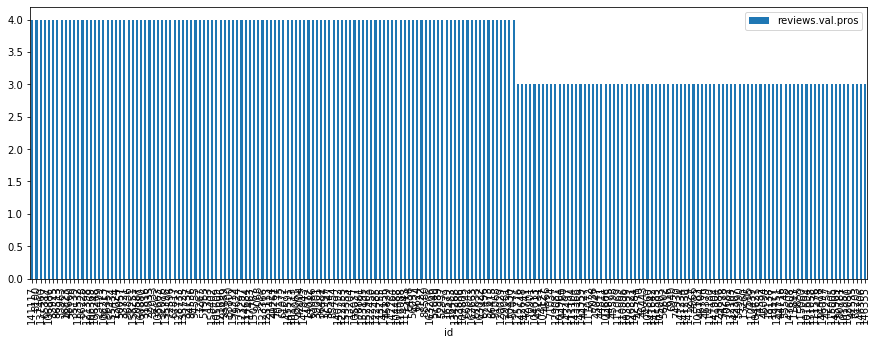

In [165]:
top_pros_salary_ids=pros_cons_analysis2("reviews.val.pros","salary")

In [150]:
def pros_cons_analysis(column,keyword):
    fig,axs=plt.subplots(figsize=(15,5))
    pros_401=df[df[column].str.lower().str.contains(keyword)]
    grp_pros_401=pros_401.groupby("id").count().reset_index()#["reviews.val.pros"]
    print(grp_pros_401)
    most_401_pros=grp_pros_401.sort_values(by=column,ascending=False)#["reviews.val.pros"]
    most_401_pros=most_401_pros.head(200)
    #print(most_401_pros.head(500))
    #print(type(most_401_pros))
    most_401_pros.plot.bar(x="id",y=column,ax=axs)
    #print(most_401_pros)
    #pros_cons_salary(most_401_pros,"reviews.val.pros","work life balance")

           id  index  reviews.val.cons  reviews.val.date  \
0          12      1                 1                 1   
1          25      1                 1                 1   
2          26      1                 1                 1   
3          37      1                 1                 1   
4          40      1                 1                 1   
...       ...    ...               ...               ...   
19052  165261      1                 1                 1   
19053  165274      1                 1                 1   
19054  165281      1                 1                 1   
19055  165282      1                 1                 1   
19056  165287      2                 2                 2   

       reviews.val.featured  reviews.val.helpfulCount  reviews.val.id  \
0                         1                         1               1   
1                         1                         1               1   
2                         1                         1       

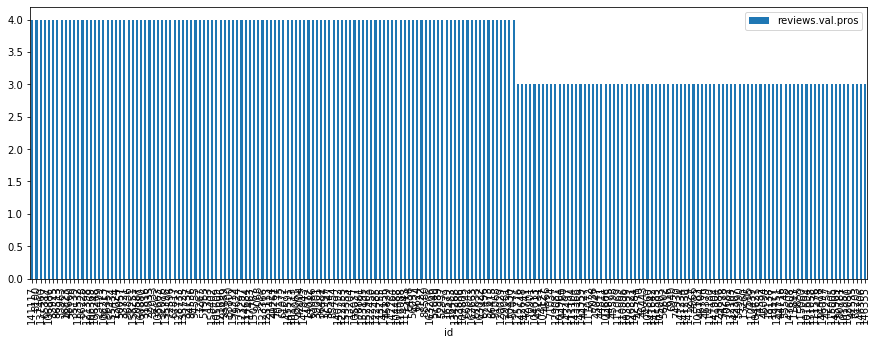

In [151]:
top_pros_salary_ids=pros_cons_analysis("reviews.val.pros","salary")




In [141]:
def pros_cons_salary(df,column,keyword):
    fig,axs=plt.subplots(figsize=(15,5))
    pros_401=df[df[column].str.lower().str.contains(keyword)]
    grp_pros_401=pros_401.groupby("id").count()#["reviews.val.pros"]
    most_401_pros=grp_pros_401.sort_values(by=column,ascending=False).reset_index()#["reviews.val.pros"]
    most_401_pros=most_401_pros.head(100)
    #print(most_401_pros.head(500))
    #print(type(most_401_pros))
    most_401_pros.plot.bar(x="id",y=column,ax=axs)
    
    return most_401_pros

#pros_cons_salary(pros_salary,"reviews.val.cons","work life balance")

,id,index,reviews.val.cons,reviews.val.date,reviews.val.featured,reviews.val.helpfulCount,reviews.val.id,reviews.val.pros,reviews.val.publishedOn,reviews.val.publisher,...,reviews.val.reviewerJobTitle,reviews.val.reviewerLocation,reviews.val.reviewerStatus,reviews.val.summaryPoints.ceoApproval,reviews.val.summaryPoints.outlook,reviews.val.summaryPoints.recommend,reviews.val.title,reviews.val.adviceToManagement,reviews.val.companyResponse,reviews.val.reviewResponses
0,21424,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,1,0,0
1,31816,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,2,0,0
2,85454,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,2,0,0
3,106248,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,1,0,0
4,122450,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,126321,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,1,0,0
96,132916,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,1,0,0
97,158125,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,1,0,0
98,133886,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,0,0


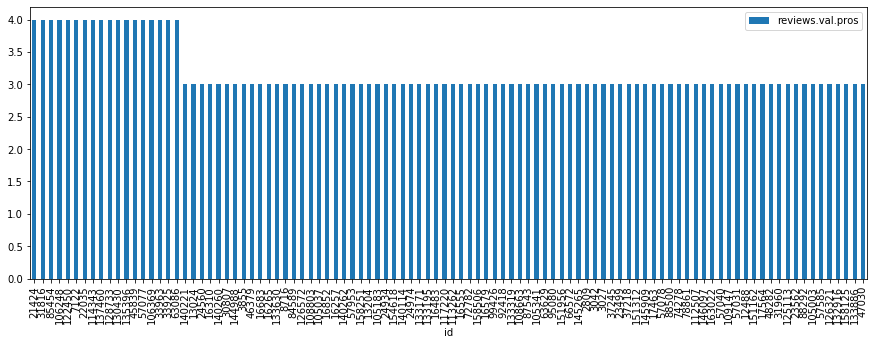

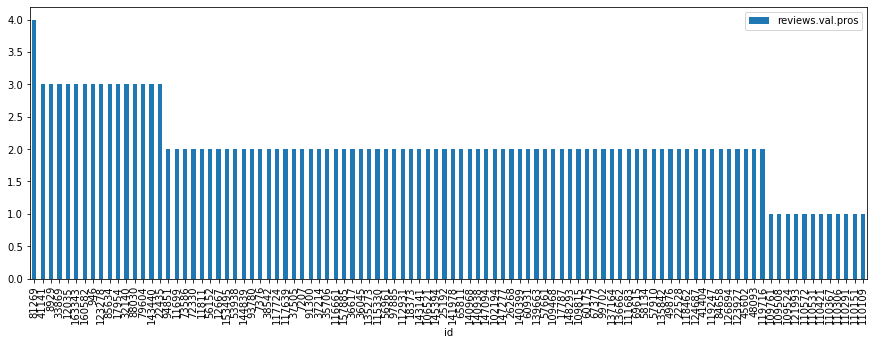

In [104]:
pros_cons_analysis("reviews.val.pros","flexible")

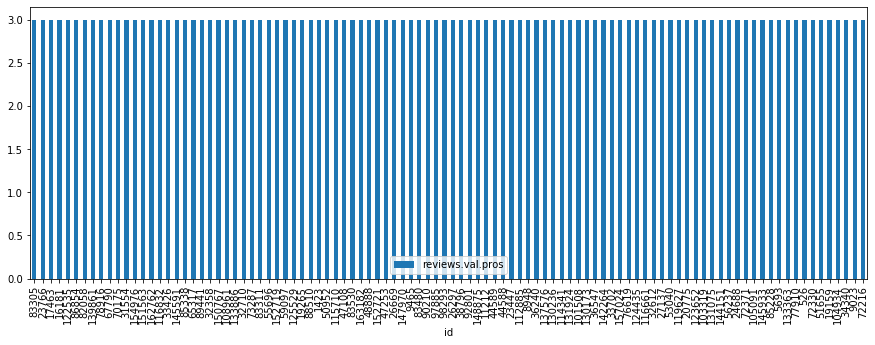

In [106]:
pros_cons_analysis("reviews.val.pros","manager")

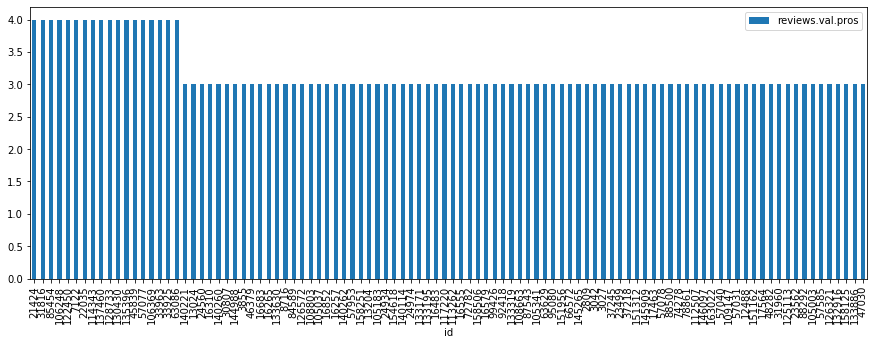

In [107]:
pros_cons_analysis("reviews.val.pros","salary")

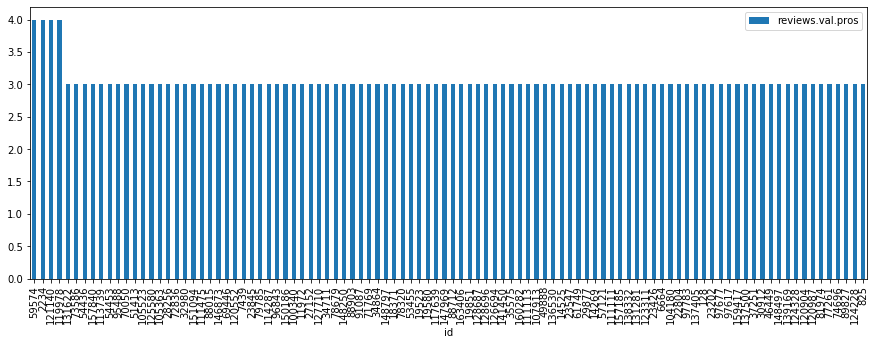

In [108]:
pros_cons_analysis("reviews.val.pros","pay")

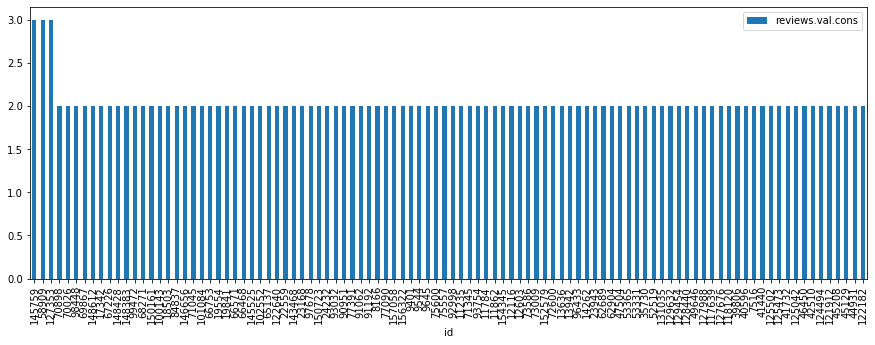

In [109]:
pros_cons_analysis("reviews.val.cons","work life balance")

In [105]:
grp_company=df.groupby(["id"])["reviews.val.pros"]
grp_company

In [62]:
grp_company_pros_count=df.groupby(["id"]).count()["reviews.val.pros"]
top_20_company_pros_company=grp_company_pros_count.sort_values(ascending=False)#.head(500)
top_20_company_pros_company
#grp_company
#d=grp_company.count()
#d.head(1000,Truncate=False)


id
78561     6
125265    6
36737     6
101151    6
109614    6
         ..
94410     1
94412     1
94413     1
94414     1
1         1
Name: reviews.val.pros, Length: 165290, dtype: int64

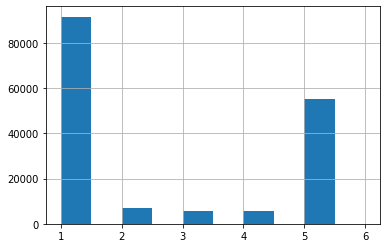

In [67]:
#b=top_20_company_pros_company.max()
top_20_company_pros_company.hist()#bins=b)

In [55]:
#checking if top pros commenter talked about 401k

top_20_company_pros_company=pd.DataFrame(top_20_company_pros_company)
pros_401=pd.DataFrame(pros_401)
top_20_company_pros_company.join(pros_401,lsuffix='_caller', rsuffix='_other')

,reviews.val.pros_caller,id,index,reviews.val.cons,reviews.val.date,reviews.val.featured,reviews.val.helpfulCount,reviews.val.id,reviews.val.pros_other,reviews.val.publishedOn,...,reviews.val.reviewerJobTitle,reviews.val.reviewerLocation,reviews.val.reviewerStatus,reviews.val.summaryPoints.ceoApproval,reviews.val.summaryPoints.outlook,reviews.val.summaryPoints.recommend,reviews.val.title,reviews.val.adviceToManagement,reviews.val.companyResponse,reviews.val.reviewResponses
id,,,,,,,,,,,,,,,,,,,,,
78561,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125265,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36737,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101151,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109614,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95948,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71230,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137039,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96299,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


       id  index  reviews.val.cons  reviews.val.date  reviews.val.featured  \
0  114366      3                 3                 3                     3   
1  114369      3                 3                 3                     3   
2  155608      3                 3                 3                     3   
3   14189      3                 3                 3                     3   
4  121140      2                 2                 2                     2   
5   47686      2                 2                 2                     2   
6  137337      2                 2                 2                     2   
7  139318      2                 2                 2                     2   
8   27783      2                 2                 2                     2   
9  132424      2                 2                 2                     2   

   reviews.val.helpfulCount  reviews.val.id  reviews.val.pros  \
0                         3               3                 3   
1          

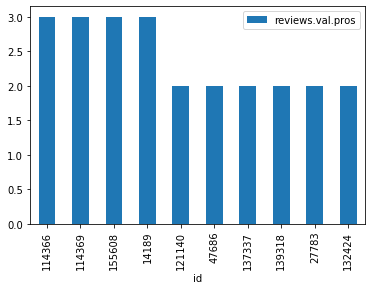

In [77]:
pros_401=df[df["reviews.val.pros"].str.contains("401")]
grp_pros_401=pros_401.groupby("id").count()#["reviews.val.pros"]
most_401_pros=grp_pros_401.sort_values(by="reviews.val.pros",ascending=False).reset_index()#["reviews.val.pros"]
most_401_pros=most_401_pros.head(10)
print(most_401_pros.head(100))
print(type(most_401_pros))
most_401_pros.plot.bar(x="id",y="reviews.val.pros")

In [ ]:
grp_pros_401

In [21]:
df.shape

(422180, 28)

In [22]:
pros_401=df[df["reviews.val.pros"].str.contains("salary")]
grp_pros_401=pros_401.groupby("id").count()
grp_pros_401

,index,reviews.val.cons,reviews.val.date,reviews.val.featured,reviews.val.helpfulCount,reviews.val.id,reviews.val.pros,reviews.val.publishedOn,reviews.val.publisher,reviews.val.reviewRatings.careerOpportunities,...,reviews.val.reviewerJobTitle,reviews.val.reviewerLocation,reviews.val.reviewerStatus,reviews.val.summaryPoints.ceoApproval,reviews.val.summaryPoints.outlook,reviews.val.summaryPoints.recommend,reviews.val.title,reviews.val.adviceToManagement,reviews.val.companyResponse,reviews.val.reviewResponses
id,,,,,,,,,,,,,,,,,,,,,
10,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
12,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
35,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
36,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
37,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165232,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
165237,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
165238,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0


In [30]:
pros_401=df[df["reviews.val.pros"].str.contains("manager")]
grp_pros_401=pros_401.groupby("id").count()
grp_pros_401[grp_pros_401==1.0].count()

index                                            8488
reviews.val.cons                                 8488
reviews.val.date                                 8488
reviews.val.featured                             8488
reviews.val.helpfulCount                         8488
reviews.val.id                                   8488
reviews.val.pros                                 8488
reviews.val.publishedOn                          8488
reviews.val.publisher                            8488
reviews.val.reviewRatings.careerOpportunities    8488
reviews.val.reviewRatings.compBenefits           8488
reviews.val.reviewRatings.cultureValues          8488
reviews.val.reviewRatings.overall                8488
reviews.val.reviewRatings.seniorManagement       8488
reviews.val.reviewRatings.worklifeBalance        8488
reviews.val.reviewerDuration                     7997
reviews.val.reviewerInformation                  8488
reviews.val.reviewerJobTitle                     7369
reviews.val.reviewerLocation

In [ ]:
df[df["reviews.val.pros"].str.contains("401")]


In [42]:
cons_401=df[df["reviews.val.cons"].str.contains("401")]
grp_cons_401=cons_401.groupby("id").count()
grp_cons_401

,index,reviews.val.cons,reviews.val.date,reviews.val.featured,reviews.val.helpfulCount,reviews.val.id,reviews.val.pros,reviews.val.publishedOn,reviews.val.publisher,reviews.val.reviewRatings.careerOpportunities,...,reviews.val.reviewerJobTitle,reviews.val.reviewerLocation,reviews.val.reviewerStatus,reviews.val.summaryPoints.ceoApproval,reviews.val.summaryPoints.outlook,reviews.val.summaryPoints.recommend,reviews.val.title,reviews.val.adviceToManagement,reviews.val.companyResponse,reviews.val.reviewResponses
id,,,,,,,,,,,,,,,,,,,,,
227,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
691,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
781,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
2211,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
3792,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161272,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
162023,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
163240,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0


In [41]:
cons_salary=df[df["reviews.val.cons"].str.contains("salary")]
grp_cons_salary=cons_401.groupby("id").count()
grp_cons_salary

,index,reviews.val.cons,reviews.val.date,reviews.val.featured,reviews.val.helpfulCount,reviews.val.id,reviews.val.pros,reviews.val.publishedOn,reviews.val.publisher,reviews.val.reviewRatings.careerOpportunities,...,reviews.val.reviewerJobTitle,reviews.val.reviewerLocation,reviews.val.reviewerStatus,reviews.val.summaryPoints.ceoApproval,reviews.val.summaryPoints.outlook,reviews.val.summaryPoints.recommend,reviews.val.title,reviews.val.adviceToManagement,reviews.val.companyResponse,reviews.val.reviewResponses
id,,,,,,,,,,,,,,,,,,,,,
12,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
25,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
37,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
40,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
60,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165238,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
165251,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
165274,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
